In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [3]:
# co-ordinates:
x = np.arange(-3.5,3.5,0.01)
y = np.arange(-2.,2.,0.01)
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
Th = np.arctan2(Y,X)
Th[Th<0]=Th[Th<0]+np.pi*2.


<IPython.core.display.Javascript object>


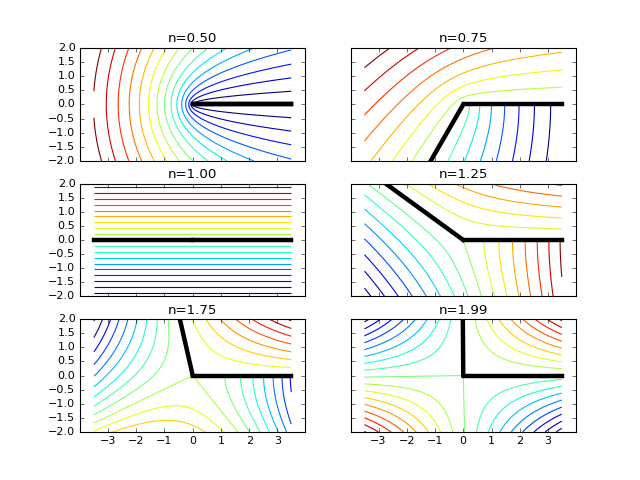

In [5]:
fig,axs=plt.subplots(3,2,sharex=True,sharey=True)
axs=axs.flatten()
A = 1.2
for num,n in enumerate([0.5,0.75, 1., 1.25, 1.75, 1.99]):
    ax = axs[num]
    psi = A*R**n*np.sin(n*Th)
    ax.contour(x,y,psi,20)
    ax.plot(x[x>=0],0*x[x>=0],lw=4,c='k')
    rr = (x[x>0].astype('complex'))*np.exp(1j*np.pi/n)
    
    ax.plot(np.real(rr),np.imag(rr),lw=4,c='k')
    ax.set_xlim([-2.,2])
    ax.set_ylim([-2.,2])
    ax.set_title('n=%1.2f'%n)
    ax.set_aspect(1.)
if 1:
    fig.savefig('PotentialFlows.pdf')

<IPython.core.display.Javascript object>


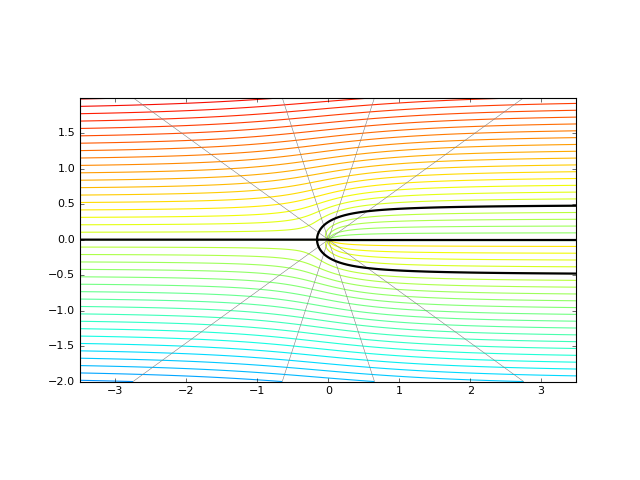

In [68]:
# Flow around half body:
a=1.
U=1.
m=1.
psi = U*R*np.sin(Th)+m*Th/2./np.pi
psi0 = m*Th/2./np.pi
fig,ax=plt.subplots()
ax.contour(x,y,psi,np.arange(-3.,3.,0.1))
ax.contour(x,y,psi0,np.arange(-3.,3.,0.1),colors='0.5',linewidths=0.5)
ax.contour(x,y,psi,np.array([0.5,10000.]),colors='k',linewidths=2)
ax.set_aspect(1.)
if 1:
     fig.savefig('FlowHalfBody.pdf')

<IPython.core.display.Javascript object>


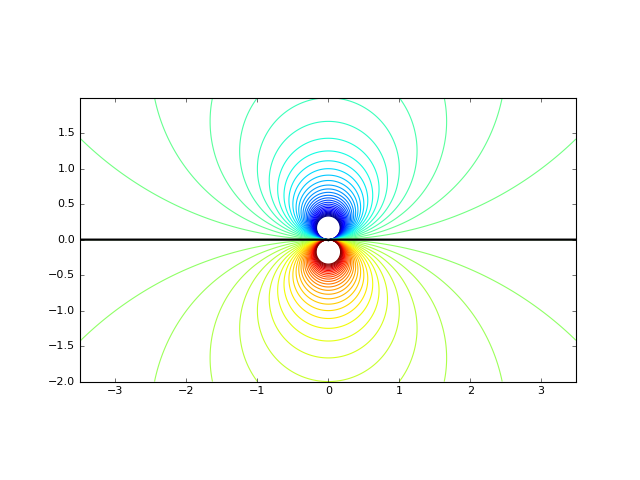

In [63]:
# Flow around cylander:
a=1.
U=1.
psi = U*(-a**2/R)*np.sin(Th)
fig,ax=plt.subplots()
ax.contour(x,y,psi,np.arange(-3.,3.,0.1))
ax.contour(x,y,psi,np.array([0.,10000.]),colors='k',linewidths=2)
ax.set_aspect(1.)
if 1:
     fig.savefig('FlowDoublet.pdf')

<IPython.core.display.Javascript object>


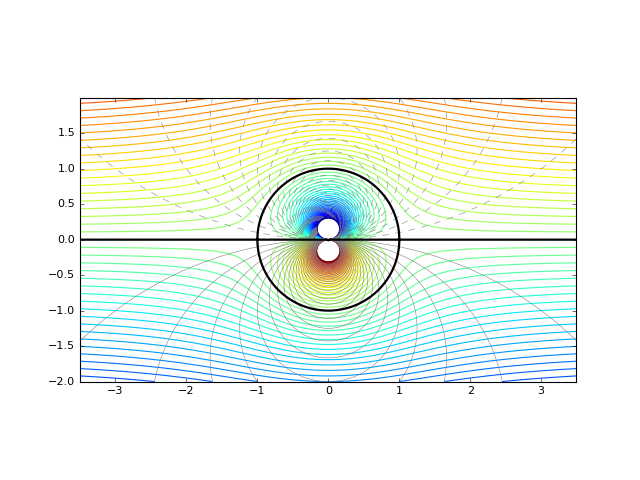

In [69]:
# Flow around cylander:
a=1.
U=1.
psi = U*(R-a**2/R)*np.sin(Th)
psi0 = U*(-a**2/R)*np.sin(Th)
fig,ax=plt.subplots()
ax.contour(x,y,psi,np.arange(-3.,3.,0.1))
ax.contour(x,y,psi0,np.arange(-3.,3.,0.1),colors='0.5',linewidths=0.5)
ax.contour(x,y,psi,np.array([0.,10000.]),colors='k',linewidths=2)
ax.set_aspect(1.)
if 1:
     fig.savefig('FlowCylinder.pdf')

<IPython.core.display.Javascript object>


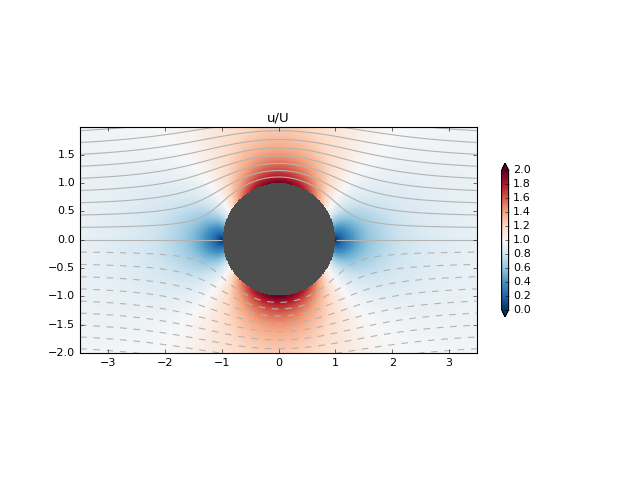

In [101]:
# Flow around cylander: |u|

a=1.
U=1.
psi = U*(R-a**2/R)*np.sin(Th)
psi0 = U*(-a**2/R)*np.sin(Th)
fig,ax=plt.subplots()
ur = U*(1-a**2/R**2)*np.cos(Th)
ut = -U*(1+a**2/R**2)*np.sin(Th)
uu = np.abs(ur+1j*ut)
uu = np.ma.masked_where(R<=1.,uu)
psi = np.ma.masked_where(R<1.,psi)

ax.contour(x,y,psi,np.arange(-3.,3.,0.2),colors='0.7')
pc=ax.pcolormesh(x,y,uu,vmin=0.,vmax=2.,cmap='RdBu_r',rasterized=True)
#ax.contour(x,y,psi0,np.arange(-3.,3.,0.1),colors='0.5',linewidths=0.5)
#ax.contour(x,y,psi,np.array([0.,10000.]),colors='k',linewidths=2)
ax.set_aspect(1.)
fig.colorbar(pc,ax=ax,shrink=0.4,extend='both')
ax.set_title('u/U')
ax.set_axis_bgcolor('0.3')
if 1:
     fig.savefig('FlowCylinderVel.pdf')

<IPython.core.display.Javascript object>


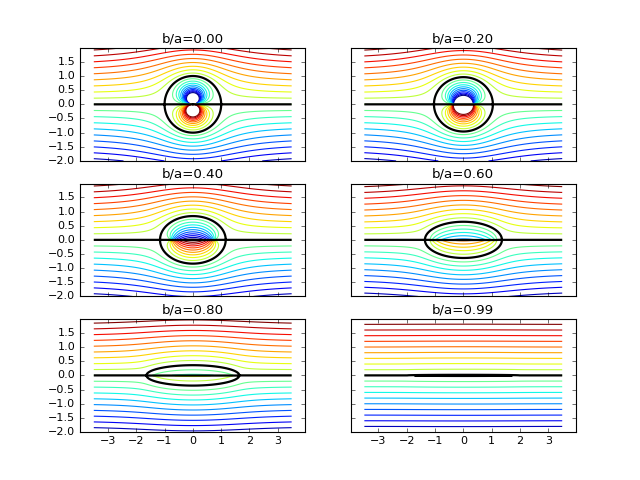

In [60]:
fig,axs=plt.subplots(3,2,sharex=True,sharey=True)
axs=axs.flatten()
a = 1.
for nn,b in enumerate([0.,0.2,0.4,0.6,0.8,0.99]):
    ax=axs[nn]
    b = a*b
    Z = X+1j*Y

    zeta = Z/2.+0.5*np.sqrt(Z**2-4*b**2)
    zeta[X<0] = Z[X<0]/2.-0.5*np.sqrt(Z[X<0]**2-4*b**2)
    W = U*(zeta+a**2/zeta)
    psi = np.imag(W)
    ax.contour(x,y,psi,np.arange(-2.,2.,0.2))
    ax.contour(x,y,psi,np.array([0.,10000.]),colors='k',linewidths=2)
    ax.set_aspect(1.)
    ax.set_title('b/a=%1.2f'%(b/a))
if 1:
    fig.savefig('FlowEllipse.pdf')

<IPython.core.display.Javascript object>


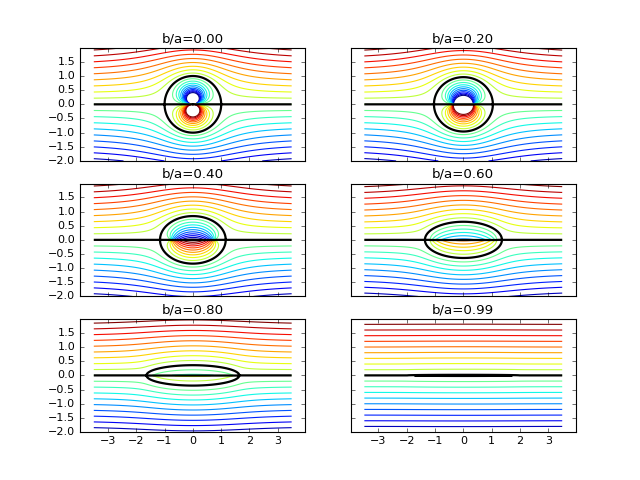

In [60]:
fig,axs=plt.subplots(3,2,sharex=True,sharey=True)
axs=axs.flatten()
a = 1.
for nn,b in enumerate([0.,0.2,0.4,0.6,0.8,0.99]):
    ax=axs[nn]
    b = a*b
    Z = X+1j*Y

    zeta = Z/2.+0.5*np.sqrt(Z**2-4*b**2)
    zeta[X<0] = Z[X<0]/2.-0.5*np.sqrt(Z[X<0]**2-4*b**2)
    W = U*(zeta+a**2/zeta)
    psi = np.imag(W)
    ax.contour(x,y,psi,np.arange(-2.,2.,0.2))
    ax.contour(x,y,psi,np.array([0.,10000.]),colors='k',linewidths=2)
    ax.set_aspect(1.)
    ax.set_title('b/a=%1.2f'%(b/a))
if 1:
    fig.savefig('FlowEllipse.pdf')

<IPython.core.display.Javascript object>


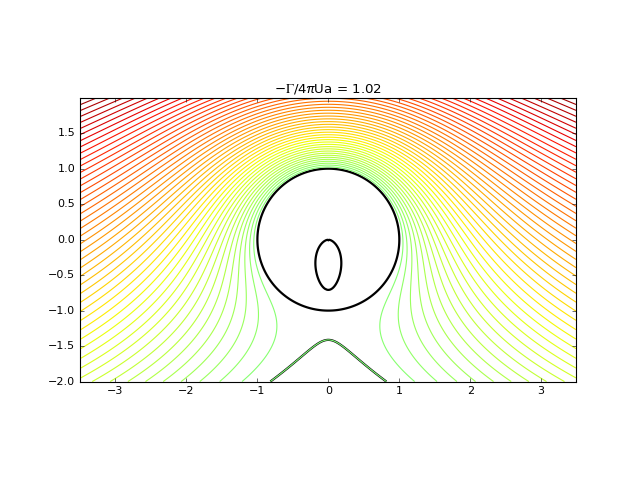

In [126]:
# Flow around cylander with gamma
a=1.
U=1.
gg=1.02
Gamma = -4.*np.pi*U*a*gg
fig,ax=plt.subplots()

psi = U*(R-a**2/R)*np.sin(Th) - Gamma/np.pi/2.*np.log(R)
ax.contour(x,y,psi,np.array([0.,10000.]),colors='k',linewidths=2)
psi=np.ma.masked_where(R<1.,psi)
ax.contour(x,y,psi,np.arange(-5.,5.,0.1))
ax.set_aspect(1.)
ax.set_axis_bgcolor('1.')
ax.set_title(r'$-\Gamma/4\pi Ua$ = %1.2f'%gg)
if 1:
     fig.savefig('FlowCylinderGamma%04d.pdf'%(gg*100))

<IPython.core.display.Javascript object>


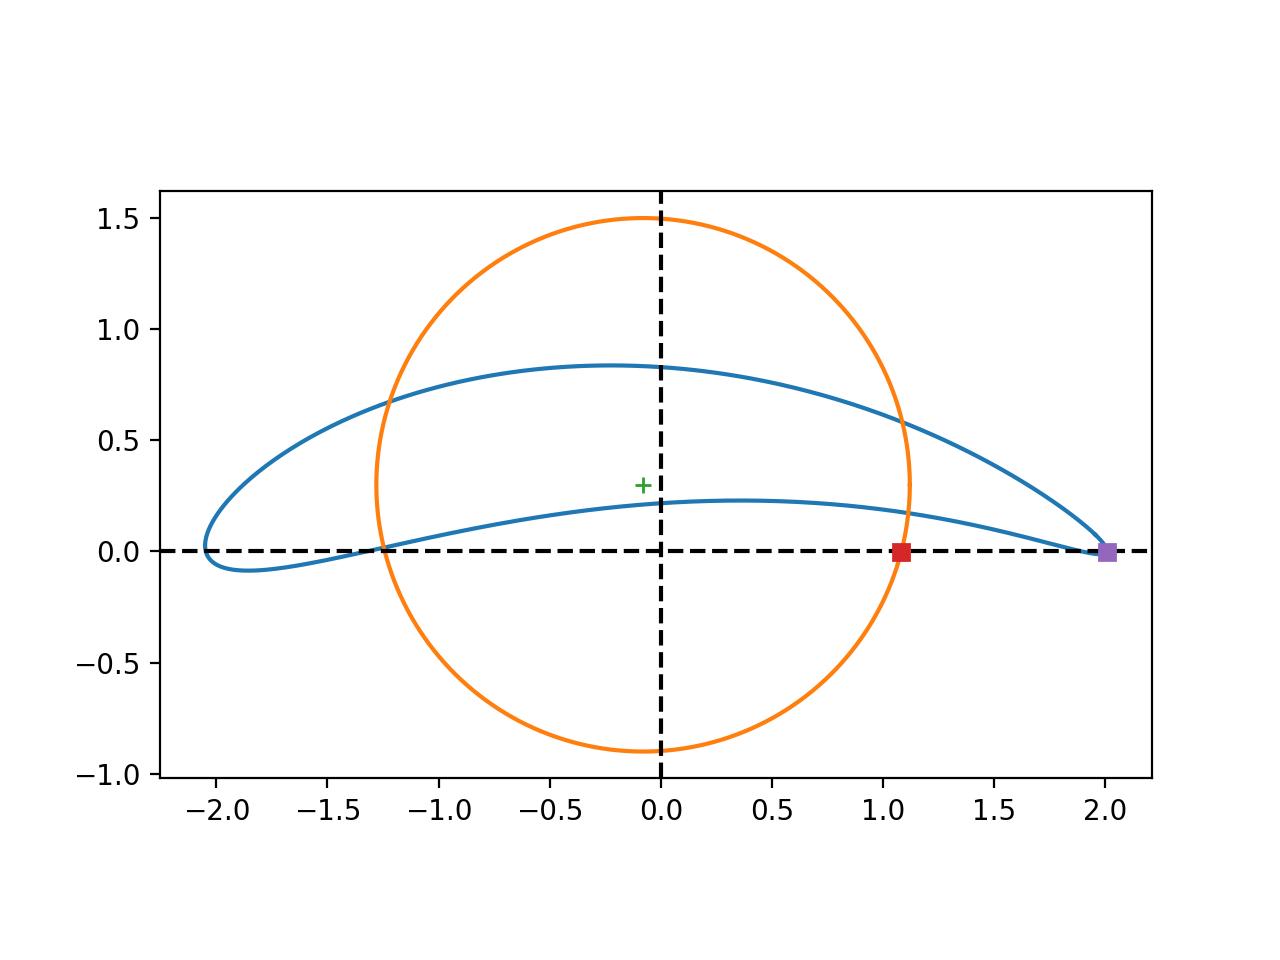

0.2531853071795862


In [4]:
# airfoils:
th = np.arange(0.,np.pi*2,0.01)
a=1.2
R=a+1j*0.
b = 1.
offset=+0.3*1j-0.08
zeta = R*np.exp(1j*th)+offset
zetaCylinder=zeta
Zfoil = zeta+b**2/zeta
fig,ax = plt.subplots()
ax.plot(np.real(Zfoil),np.imag(Zfoil))
ax.plot(np.real(zeta),np.imag(zeta))
ax.plot(np.real(offset),np.imag(offset),'+')
ax.axhline(y=0.,ls='--',color='k')
ax.axvline(x=0.,ls='--',color='k')
ax.set_aspect(1.)
# get beta:
bb = np.where(np.diff(np.signbit(np.imag(zeta))))[0]
ax.plot(np.real(zeta[bb[1]]),np.imag(zeta[bb[1]]),'s')
ax.plot(np.real(Zfoil[bb[1]]),np.imag(Zfoil[bb[1]]),'s')
beta = -np.arctan2(np.imag(zeta[bb[1]]-offset),np.real(zeta[bb[1]]-offset))
print(beta)

<IPython.core.display.Javascript object>


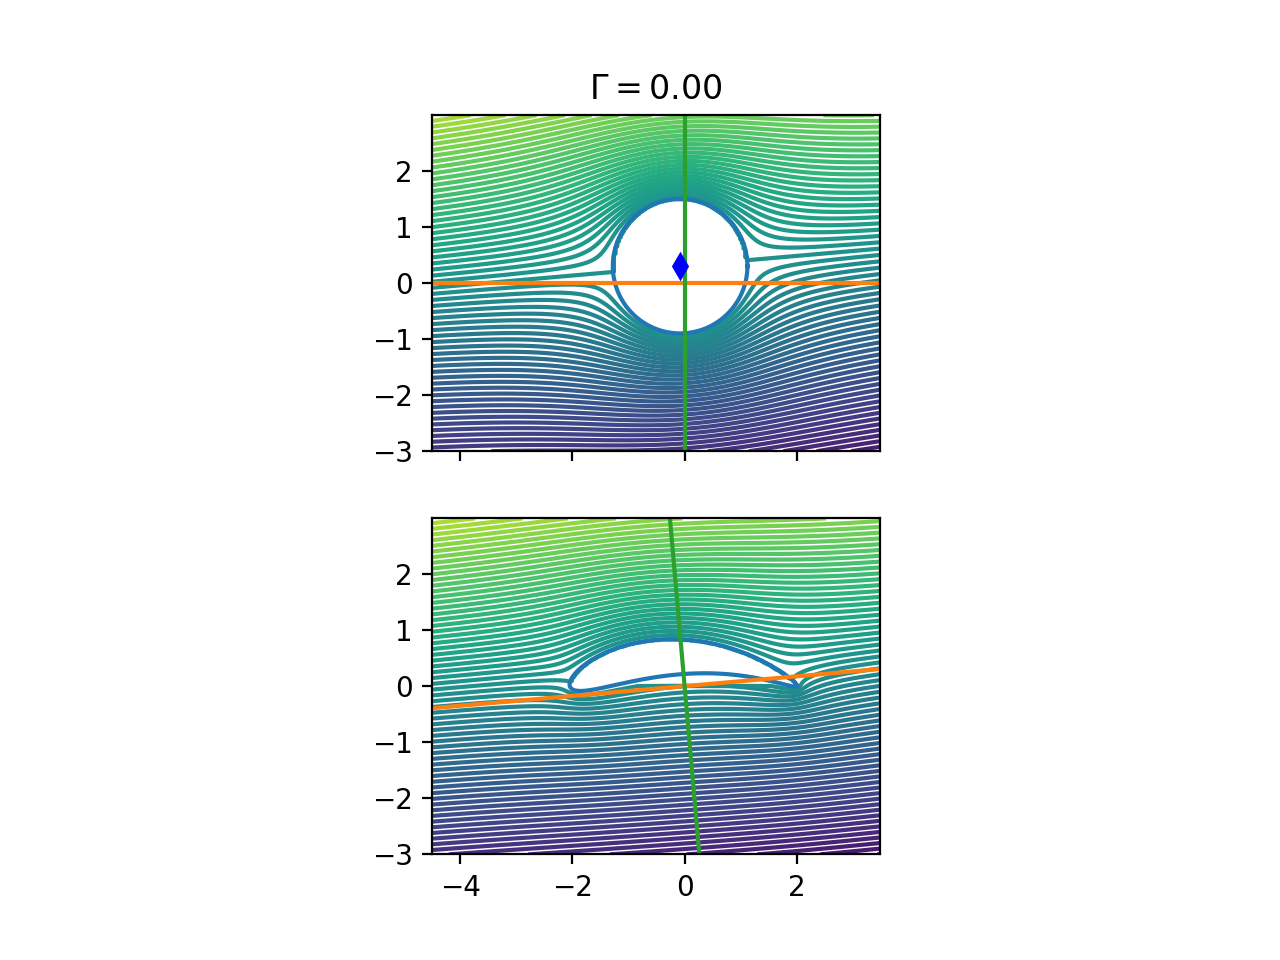

<IPython.core.display.Javascript object>


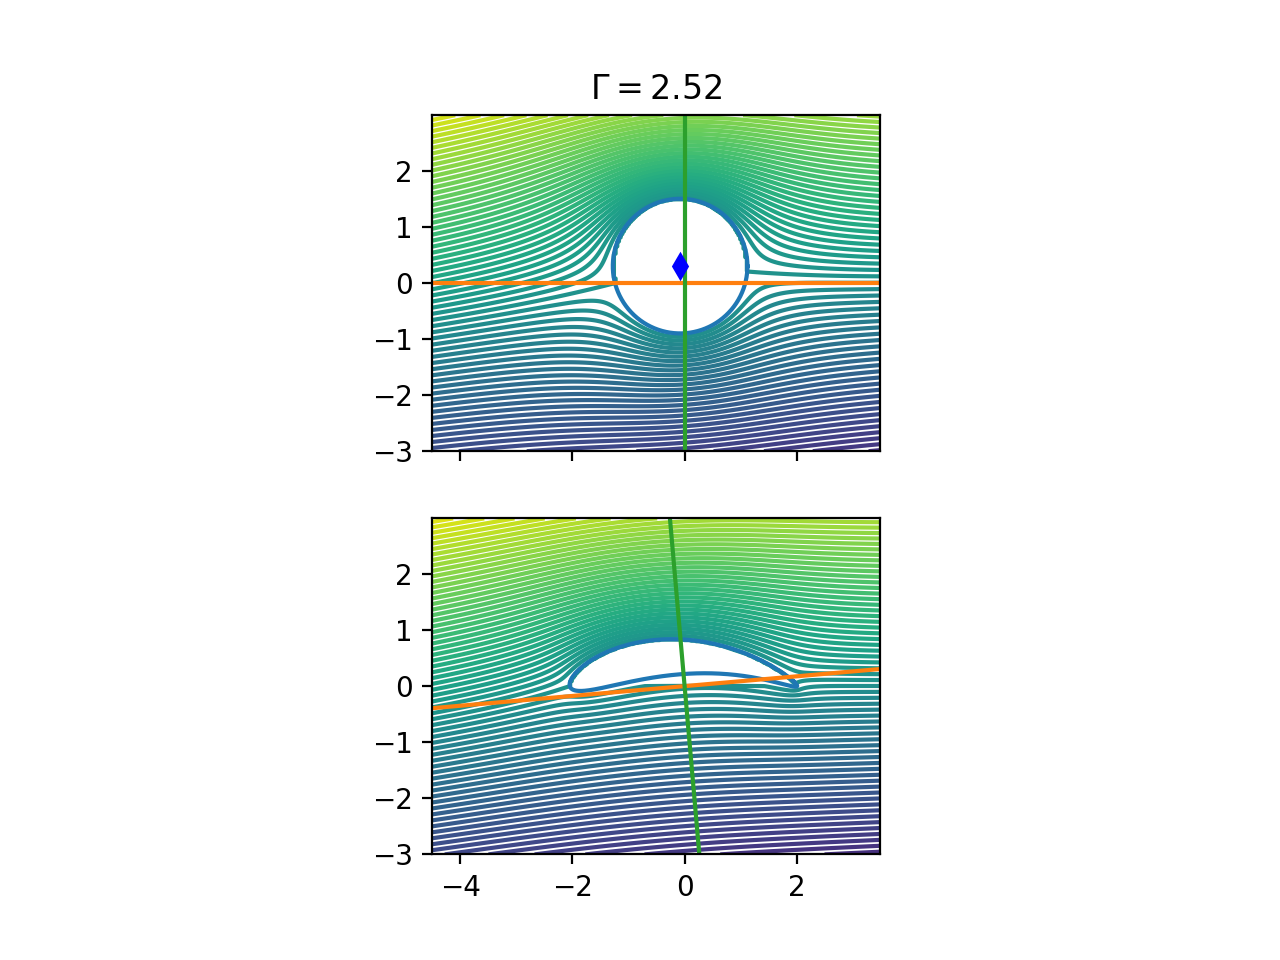

<IPython.core.display.Javascript object>


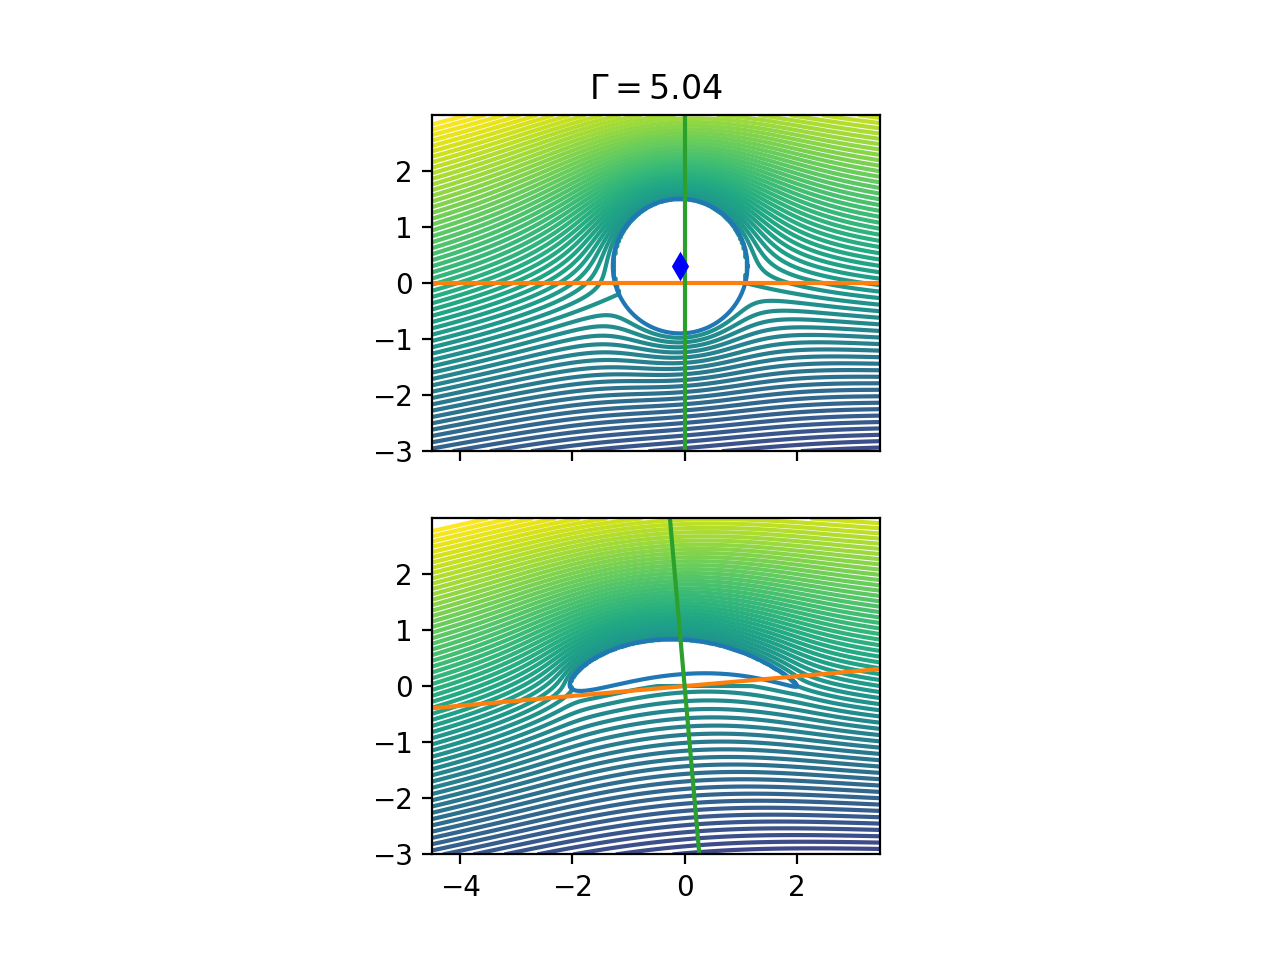

<IPython.core.display.Javascript object>


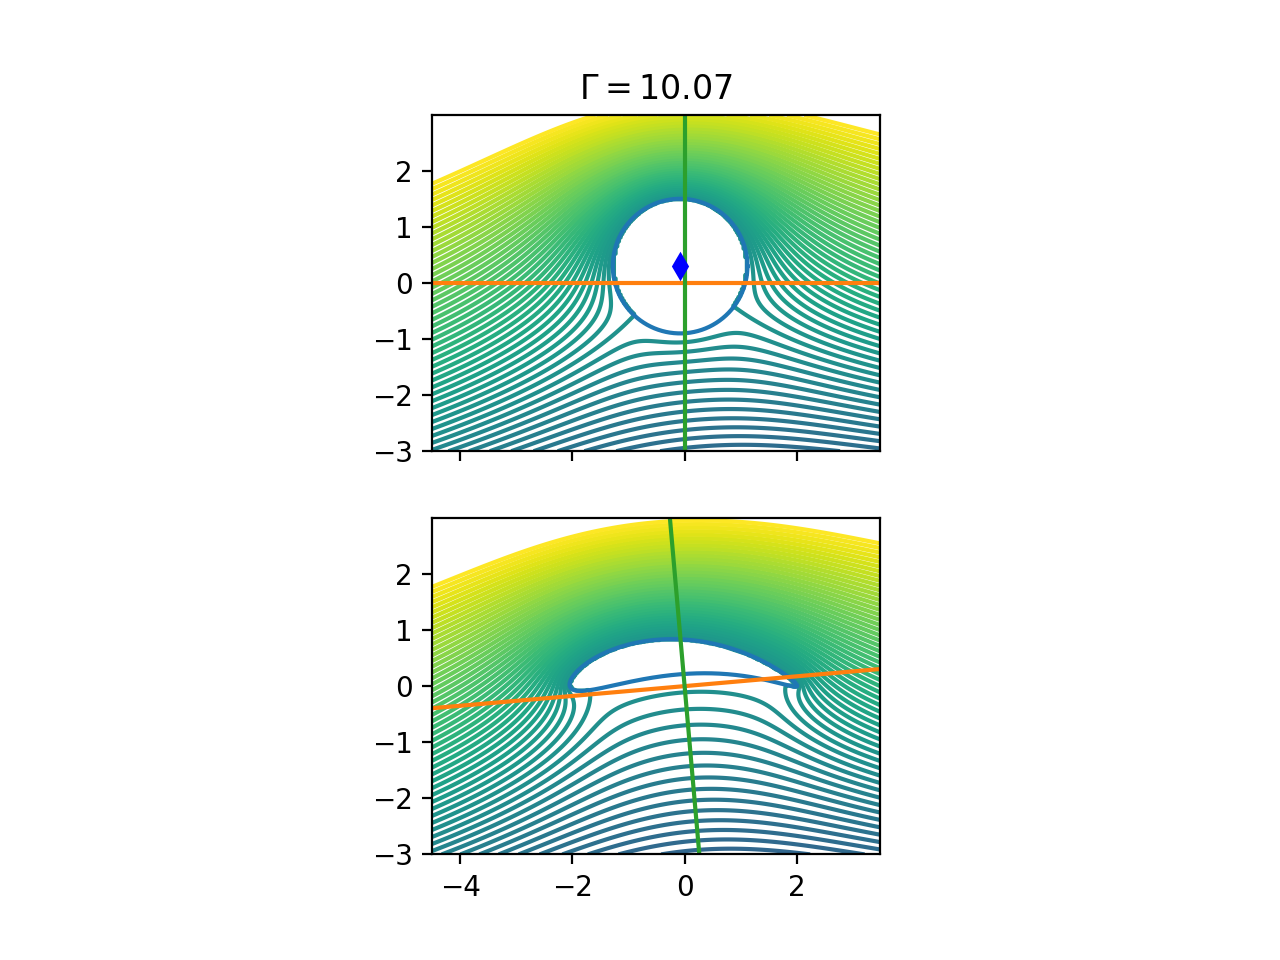

In [7]:
for gammafac in [0.,0.5,1.,2.]:
    # co-ordinates:
    x = np.arange(-4.5,3.5,0.03)
    y = np.arange(-3.,3.,0.01)
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2+Y**2)
    Th = np.arctan2(Y,X)
    Th[Th<0]=Th[Th<0]+np.pi*2.
    Z = X+1j*Y
    U=1.
    alpha = 5.
    zz = (Z-offset)*np.exp(-1j*alpha*np.pi/180.)

    Gamma = 4*np.pi*U*a*np.sin(alpha*np.pi/180.+beta)*gammafac

    W = U*(zz+a**2/zz)+1j/2./np.pi*np.log(zz/a)*Gamma
    W[np.abs(zz)<a]=np.NaN
    fig,axs = plt.subplots(2,1,sharex=True)

    axs=axs.flatten()

    ax=axs[0]
    ax.contour(x,y,np.imag(W),np.arange(-4.,4.,0.1))
    ax.set_aspect(1.)
    ax.plot(np.real(zetaCylinder),np.imag(zetaCylinder))
    xx=50.*np.exp(1j*0.*np.pi/180.)
    ax.plot([-np.real(xx),np.real(xx)],[-np.imag(xx),np.imag(xx)])
    ax.plot([np.imag(xx),-np.imag(xx)],[-np.real(xx),np.real(xx)])
    ax.plot(np.real(offset),np.imag(offset),'bd')
    ax.set_xlim([x[0],x[-1]])
    ax.set_ylim([y[0],y[-1]])



    ax=axs[1]
    zeta = Z/2.+0.5*np.sqrt(Z**2-4*b**2)
    zeta[X<np.real(0.)] = Z[X<np.real(0.)]/2.-0.5*np.sqrt(Z[X<np.real(0.)]**2-4*b**2)
    zeta = (zeta-offset)*np.exp(-1j*alpha*np.pi/180)
    W = U*(zeta+a**2/(zeta))+1j/2./np.pi*np.log((zeta)/a)*Gamma
    W[np.abs(zeta)<a]=np.NaN
    ax.plot(np.real(Zfoil),np.imag(Zfoil))
    psi = np.imag(W)
    ax.contour(x,y,psi,np.arange(-4.,4.,0.1))
    xx=50.*np.exp(1j*alpha*np.pi/180.)
    ax.plot([-np.real(xx),np.real(xx)],[-np.imag(xx),np.imag(xx)])
    ax.plot([np.imag(xx),-np.imag(xx)],[-np.real(xx),np.real(xx)])

    ax.set_aspect(1.)
    ax.set_xlim([x[0],x[-1]])
    ax.set_ylim([y[0],y[-1]])
    
    axs[0].set_title('$\Gamma = %1.2f$'%Gamma)

<IPython.core.display.Javascript object>


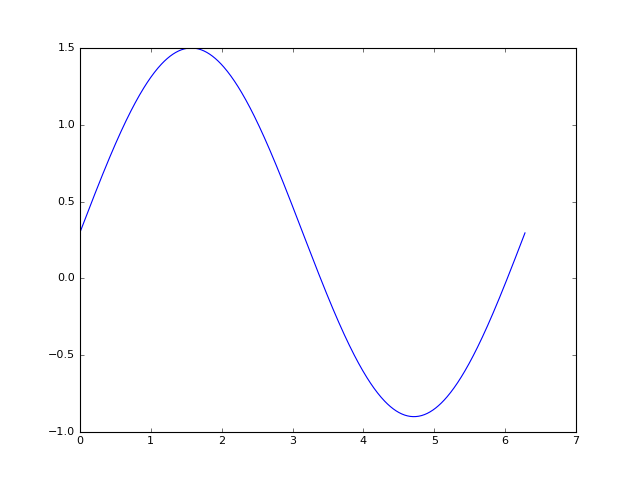

In [115]:
fig,ax = plt.subplots()
ax.plot(th,np.imag(zeta))

<IPython.core.display.Javascript object>


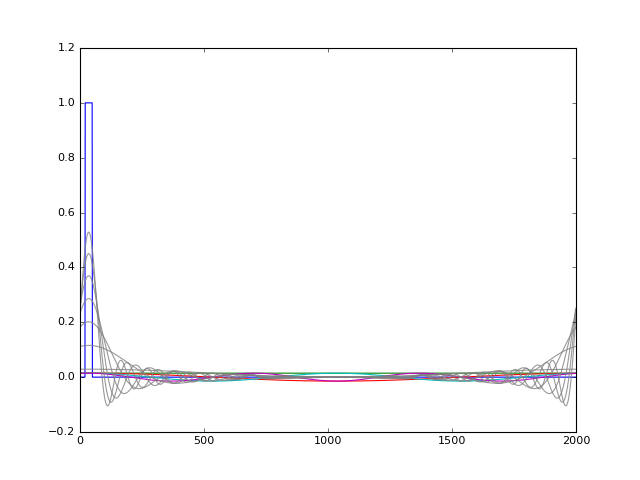

In [52]:
fig,ax = plt.subplots()
shap = np.exp(1j*np.outer(x/len(x),k))
af = shap*ff[np.newaxis,:]
ax.plot(x,np.real(np.sum(af,axis=1)))
ax.plot(x,af[:,:4])
for i in range(1,20,3):
    ax.plot(x,np.sum(af[:,:i]+af[:,(-i):],axis=1),color='0.5',alpha=0.8)
#ax.set_xlim([0,210])

<IPython.core.display.Javascript object>


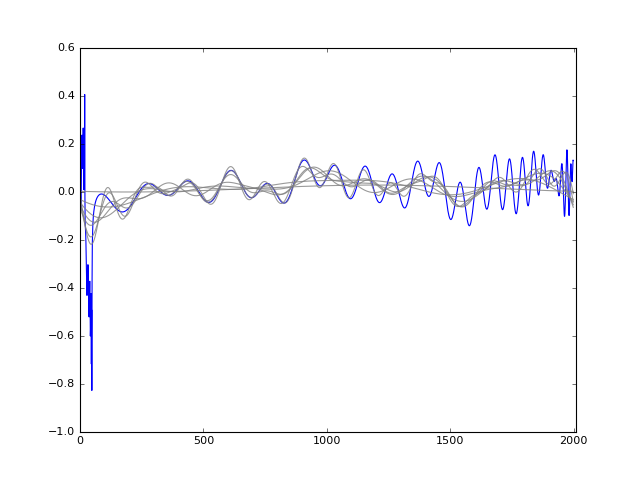

/Users/jklymak/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


(0, 2010)

In [56]:
fig,ax=plt.subplots()
g = 1.;H = 1.
t = 1000.
om = k*np.sqrt(g*H)
om = np.sqrt(g/k)
om[0] = 0
af = np.real(shap*ff[np.newaxis,:]*np.exp(-1j*om*t)[np.newaxis,:])
ax.plot(x,np.sum(af,axis=1))
for i in range(1,20,3):
    ax.plot(x,np.sum(af[:,:i]+af[:,(-i):],axis=1),color='0.5',alpha=0.8)
ax.set_xlim([0,2010])

In [69]:
print(om)

[        inf  5.64189584  3.9894228  ...,  0.12625135  0.12621975
  0.12618818]
